# Harshi Shah

# C087

Expt 5: Use SIFT to determine key points and match with other image

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img1 = cv2.imread('/content/img1')

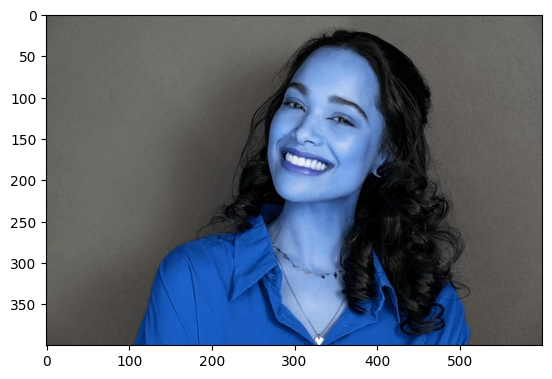

In [ ]:
plt.imshow(img1)

In [ ]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

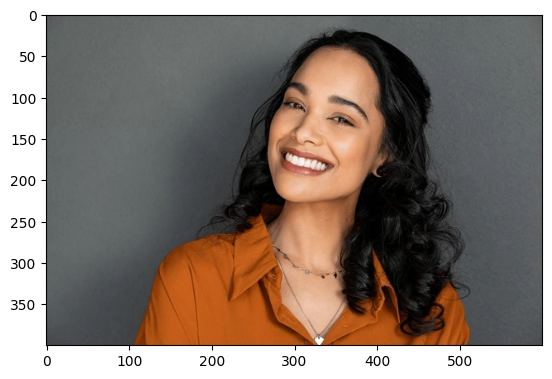

In [ ]:
plt.imshow(img1)

In [ ]:
# on this image we will apply SIFT,keypoint descriptor

In [ ]:
sift = cv2.xfeatures2d.SIFT_create(contrastThreshold=0.09)
k1,d1 = sift.detectAndCompute(img1,None)

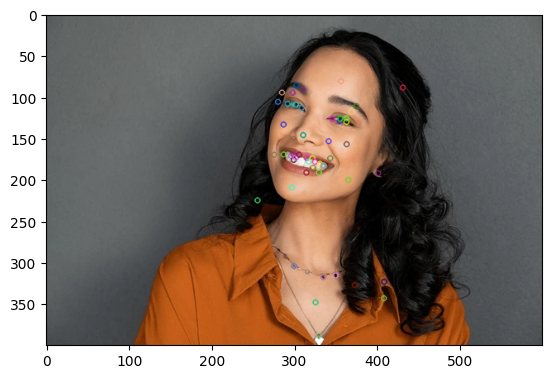

In [ ]:
img1_plot = img1.copy()
cv2.drawKeypoints(img1,k1,img1_plot)
plt.imshow(img1_plot)

Text(0.5, 1.0, 'Keypoints')

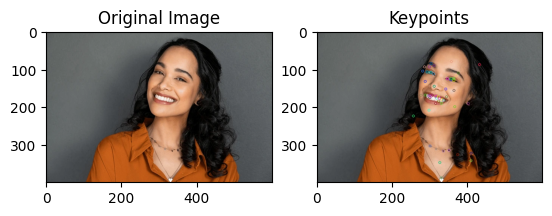

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img1)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(img1_plot)
plt.title('Keypoints')


In [ ]:
len(k1)# 300 keypoints are present, each keypoint has 128 values

64

In [ ]:
d1.shape

(64, 128)

Concusion: SIFT is applied on the image girl.png to identify the location of keypoints and their corresponding descriptor.

For a contrast threshold =0.09 the number of keypoints is 300 and each keypoint has SIFT descriptor of 128 length.

If the contrast threshold is changed to 0.10 then the number of keypoints is 240 and each keypoint has SIFT descriptor of 128 length.

If the contrast threshld is reduced more keypoints are identified. However, the length of each keypoint is the same.

In [ ]:
img2 = img1.copy()
img2=cv2.resize(img2,(500,300))

k2,d2 = sift.detectAndCompute(img2,None)

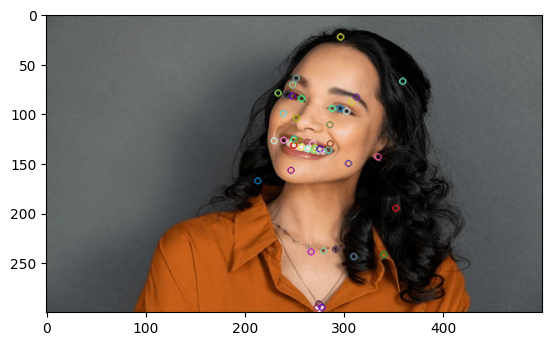

In [ ]:
img2_plot = img2.copy()
cv2.drawKeypoints(img2,k2,img2_plot)
plt.imshow(img2_plot)

Text(0.5, 1.0, 'Keypoints- Resized Image')

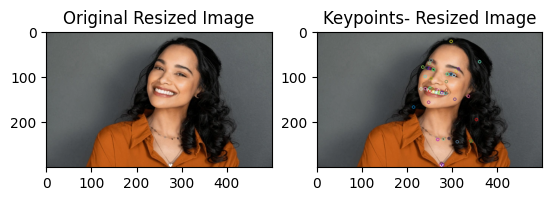

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img2)
plt.title('Original Resized Image')
plt.subplot(1,2,2)
plt.imshow(img2_plot)
plt.title('Keypoints- Resized Image')

In [ ]:

import imutils
img3 = img1.copy()
img3 = imutils.rotate(img3,10)

k3,d3 = sift.detectAndCompute(img3,None)

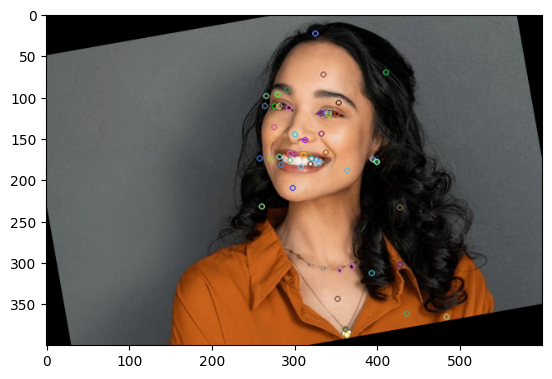

In [ ]:
img3_plot = img3.copy()
cv2.drawKeypoints(img3,k3,img3_plot)
plt.imshow(img3_plot)

Text(0.5, 1.0, 'Keypoints- Rotated Image')

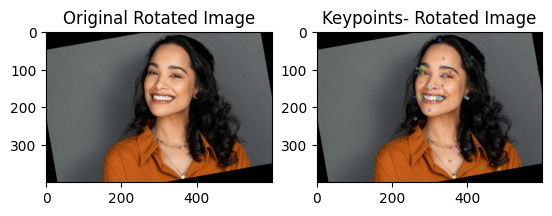

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img3)
plt.title('Original Rotated Image')
plt.subplot(1,2,2)
plt.imshow(img3_plot)
plt.title('Keypoints- Rotated Image')

In [ ]:
img4 = img1.copy()
img4 = img1[50:250,250:550]
k4,d4 = sift.detectAndCompute(img4,None)

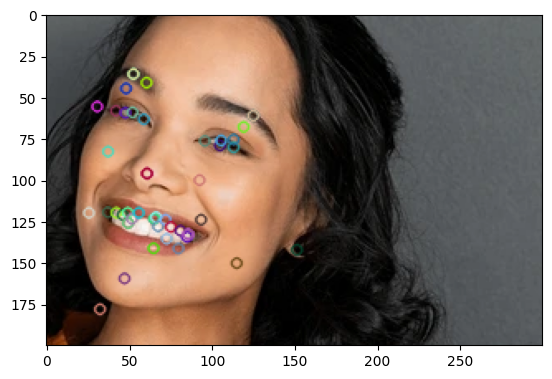

In [ ]:
img4_plot = img4.copy()
cv2.drawKeypoints(img4,k4,img4_plot)
plt.imshow(img4_plot)

Text(0.5, 1.0, 'Keypoints- Cropped Image')

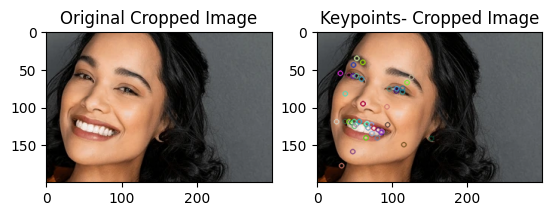

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img4)
plt.title('Original Cropped Image')
plt.subplot(1,2,2)
plt.imshow(img4_plot)
plt.title('Keypoints- Cropped Image')

Conclusion:
SIFT operator is applied on resized, rotated with +10 degree and cropped patch of the image. For these image the number of keypoints are 135, 268, 62.



In [ ]:
bf = cv2.BFMatcher()# group force matcher -minimum euclidean distance
m1_2 = bf.match(d1,d2)
m1_3 = bf.match(d1,d3)
m1_4 = bf.match(d1,d4)
m1_2 = sorted(m1_2, key = lambda x:x.distance) # top 10 descriptor
m1_3 = sorted(m1_3, key = lambda x:x.distance)
m1_4 = sorted(m1_4, key = lambda x:x.distance)
img1_2 = cv2.drawMatches(img1,k1,img2,k2,m1_2[:10],None,flags=2)
img1_3 = cv2.drawMatches(img1,k1,img3,k3,m1_3[:10],None,flags=2)
img1_4 = cv2.drawMatches(img1,k1,img4,k4,m1_4[:10],None,flags=2)

Text(0.5, 1.0, 'Original-cropped')

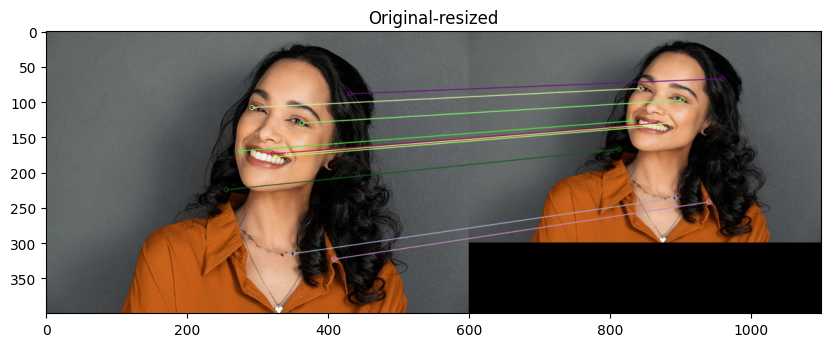

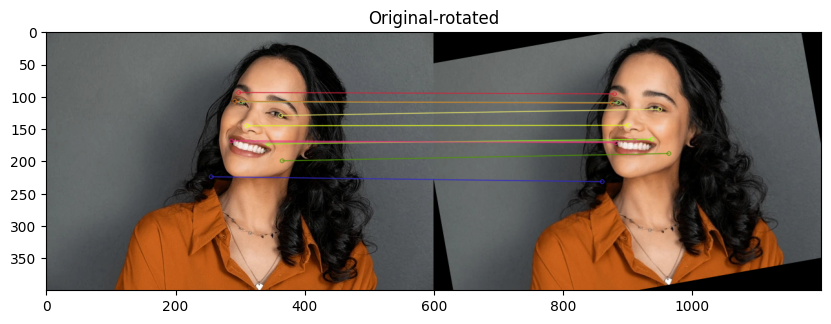

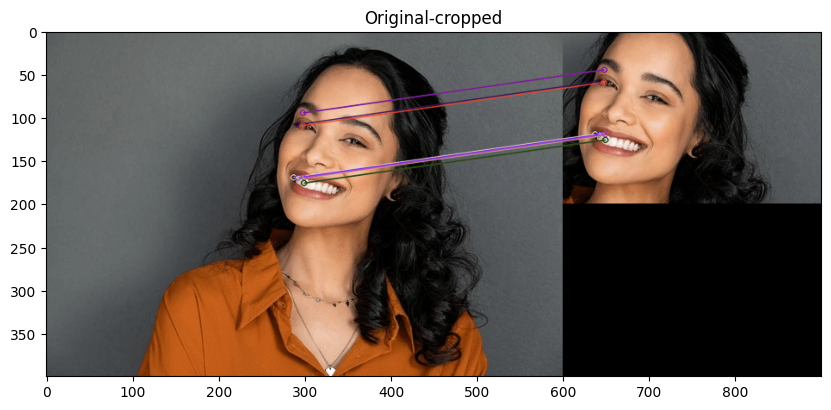

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img1_2)
plt.title('Original-resized')
plt.figure(figsize=(10,10))
plt.imshow(img1_3)
plt.title('Original-rotated')
plt.figure(figsize=(10,10))
plt.imshow(img1_4)
plt.title('Original-cropped')

Top 10 matches show correct matches for all remainders. If top 100 matches are taken, matches are mismatched.